Klasifikasi Cuaca menggunakan Data BMKG Kelompok BMKG_2 Project DTS KOMINFO

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Load Dataset

In [2]:
df = pd.read_csv("../Final Project/openweatherdata-denpasar-1990-2020v0.1.csv")
pd.set_option('display.max_columns',None)

# Eksplore Dataset

In [3]:
df.head()

,dt_iso,timezone,city_name,lat,lon,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,rain_6h,rain_12h,rain_24h,rain_today,snow_1h,snow_3h,snow_6h,snow_12h,snow_24h,snow_today,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1/1/1990 0:00,28800,Denpasar,-8.652497,115.219117,25.82,25.82,25.82,1010.0,86,1.36,225,0.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98,500,Rain,light rain,10d
1,1/1/1990 1:00,28800,Denpasar,-8.652497,115.219117,26.20,26.20,26.20,1011.0,84,2.09,247,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91,500,Rain,light rain,10d
2,1/1/1990 2:00,28800,Denpasar,-8.652497,115.219117,26.45,26.45,26.45,1011.0,84,2.44,262,0.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94,500,Rain,light rain,10d
3,1/1/1990 3:00,28800,Denpasar,-8.652497,115.219117,26.80,26.80,26.80,1011.0,82,2.29,271,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94,500,Rain,light rain,10d
4,1/1/1990 4:00,28800,Denpasar,-8.652497,115.219117,27.04,27.04,27.04,1010.0,82,1.71,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76,803,Clouds,broken clouds,04d


In [4]:
df.shape

(264924, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264924 entries, 0 to 264923
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               264924 non-null  object 
 1   timezone             264924 non-null  int64  
 2   city_name            264924 non-null  object 
 3   lat                  264924 non-null  float64
 4   lon                  264924 non-null  float64
 5   temp                 264924 non-null  float64
 6   temp_min             264924 non-null  float64
 7   temp_max             264924 non-null  float64
 8   pressure             264924 non-null  float64
 9   humidity             264924 non-null  int64  
 10  wind_speed           264924 non-null  float64
 11  wind_deg             264924 non-null  int64  
 12  rain_1h              16286 non-null   float64
 13  rain_3h              16156 non-null   float64
 14  rain_6h              36098 non-null   float64
 15  rain_12h         

In [6]:
#Checking Missing value
# Number of missing values
num_null = df.isnull().sum()

# percentage null values
pct_null = round((num_null/df.shape[0] * 100), 3)

# Create dataframe for number of null value and percentage of null values
df_null = pd.DataFrame({
    'Null Values':num_null,
    'Percentage':pct_null}).reset_index()

# Rename column index to Feature 
df_null.rename(columns={'index':'Features'}, inplace=True)

# Filter only features with null values and sort as descending
df_null = df_null[df_null['Null Values'] > 0].sort_values('Null Values', ascending=False).reset_index(drop=True)
df_null

,Features,Null Values,Percentage
0,rain_today,264924,100.000
1,snow_1h,264924,100.000
2,snow_3h,264924,100.000
3,snow_6h,264924,100.000
4,snow_12h,264924,100.000
5,snow_24h,264924,100.000
6,snow_today,264924,100.000
7,rain_12h,264912,99.995
8,rain_24h,258107,97.427
9,rain_3h,248768,93.902


In [7]:
df.duplicated(subset='dt_iso').sum()

1788

In [8]:
for col in df:
     print(f" {col}", df[col].unique())

 dt_iso ['1/1/1990 0:00' '1/1/1990 1:00' '1/1/1990 2:00' ... '1/7/2020 21:00'
 '1/7/2020 22:00' '1/7/2020 23:00']
 timezone [28800]
 city_name ['Denpasar']
 lat [-8.652497]
 lon [115.219117]
 temp [25.82 26.2  26.45 ... 33.19 32.51 33.73]
 temp_min [25.82 26.2  26.45 26.8  27.04 27.23 27.32 27.29 27.34 27.4  27.33 26.79
 26.29 26.06 25.92 25.91 25.88 25.79 25.52 25.15 25.1  25.12 25.03 25.2
 25.25 25.47 25.68 25.57 25.81 26.23 26.55 26.46 26.11 25.63 25.44 25.3
 25.17 24.99 24.92 24.94 24.98 25.89 26.09 26.39 26.67 26.75 26.78 26.73
 26.93 26.97 26.89 27.03 27.25 27.27 27.36 27.48 27.52 27.44 27.18 27.1
 26.57 26.66 26.68 27.02 27.07 27.08 26.54 26.86 26.3  26.4  26.28 25.96
 26.24 26.41 26.6  26.72 26.76 26.74 27.15 27.55 27.75 27.94 28.15 28.23
 28.36 28.6  28.83 28.82 28.56 28.25 27.99 27.64 27.69 27.72 27.68 27.62
 27.65 27.71 27.43 27.5  27.54 27.57 27.67 27.7  27.74 27.76 27.46 27.78
 27.89 27.95 28.03 27.98 27.87 27.93 28.1  28.2  28.22 28.06 27.91 27.9
 27.81 27.28 27.22 27.42 

 snow_3h [nan]
 snow_6h [nan]
 snow_12h [nan]
 snow_24h [nan]
 snow_today [nan]
 clouds_all [ 98  91  94  76  65  68  71  87 100  95  97  99  96  92  93  82  89  90
  78  77  52  21  36  56  60  58  55  61  79  73  80  75  40  88  49  38
  62  81  74  85  66  20  84  83  72  64  53  54  39  34  27   7  10  25
  37  30  59  51  22  11  16  17  47  70  48  57  46  35  44  69  63  67
  86  26  14  12  13  32  33  45   5   4  28  31  42  19  23  41  50  43
  24  18   6  29   8   9  15   1   0   3   2]
 weather_id [500 803 804 501 502 801 802 211 800 721 201 202 503 761 521 741 701 771
 781 711 520 522 300 200 210 212 301 762]
 weather_main ['Rain' 'Clouds' 'Thunderstorm' 'Clear' 'Haze' 'Dust' 'Fog' 'Mist'
 'Squall' 'Tornado' 'Smoke' 'Drizzle' 'Ash']
 weather_description ['light rain' 'broken clouds' 'overcast clouds' 'moderate rain'
 'heavy intensity rain' 'few clouds' 'scattered clouds'
 'proximity thunderstorm' 'sky is clear' 'haze' 'thunderstorm'
 'thunderstorm with rain' 'thunderstorm 

In [9]:
df.describe()

,timezone,lat,lon,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,rain_6h,rain_12h,rain_24h,rain_today,snow_1h,snow_3h,snow_6h,snow_12h,snow_24h,snow_today,clouds_all,weather_id
count,264924.0,2.649240e+05,2.649240e+05,264924.000000,264924.000000,264924.000000,264924.000000,264924.000000,264924.000000,264924.000000,16286.000000,16156.000000,36098.000000,12.00000,6817.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,264924.000000,264924.000000
mean,28800.0,-8.652497e+00,1.152191e+02,27.273336,27.147962,27.397479,1010.032919,80.844997,3.612394,158.204696,0.470510,6.728510,1.805094,116.70000,13.797125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.478960,751.160046
std,0.0,1.776360e-15,8.526529e-14,1.962571,1.973218,1.989172,2.286581,8.720109,1.909580,85.000051,0.677744,11.357441,7.626013,116.63589,21.041274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.930149,125.287769
min,28800.0,-8.652497e+00,1.152191e+02,3.000000,2.000000,3.000000,998.400000,14.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.80000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,200.000000
25%,28800.0,-8.652497e+00,1.152191e+02,25.940000,25.820000,26.000000,1008.400000,74.000000,2.100000,106.000000,0.150000,0.800000,0.000000,7.70000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,801.000000
50%,28800.0,-8.652497e+00,1.152191e+02,27.000000,27.000000,27.000000,1010.200000,83.000000,3.600000,120.000000,0.240000,2.000000,0.000000,113.00000,5.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.000000,801.000000
75%,28800.0,-8.652497e+00,1.152191e+02,28.600000,28.400000,29.000000,1011.900000,88.000000,4.710000,250.000000,0.520000,7.000000,0.000000,222.00000,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,802.000000
max,28800.0,-8.652497e+00,1.152191e+02,39.000000,39.000000,39.800000,1023.200000,100.000000,31.900000,360.000000,19.100000,116.000000,206.000000,240.00000,255.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,804.000000


Berdasarkan hasil explorasi data di atas diperoleh beberapa data yang mengalami missing value dan terdapat data yang duplicated. oleh karena itu, diperlukan handling data untuk mengatasi hal tersebut.

# Data Cleaning

In [10]:
#handling missing value untuk fitur rain
df = df.drop_duplicates(subset='dt_iso') #drop row has same time

In [11]:
#handling missing value
df = df.fillna(0)

Dikarenakan ini merupakan data pengukuran, maka cel-cel yang tidak ada nilainya atau NAN kami anggap memiliki nilai nol

In [12]:
df['weather_description'].nunique()

29

# Re-Check Data

In [13]:
#Checking Missing value
# Number of missing values
num_null = df.isnull().sum()

# percentage null values
pct_null = round((num_null/df.shape[0] * 100), 2)

# Create dataframe for number of null value and percentage of null values
df_null = pd.DataFrame({
    'Null Values':num_null,
    'Percentage':pct_null}).reset_index()

# Rename column index to Feature 
df_null.rename(columns={'index':'Features'}, inplace=True)

# Filter only features with null values and sort as descending
# df_null = df_null[df_null['Null Values'] > 0].sort_values('Null Values', ascending=False).reset_index(drop=True)
df_null

,Features,Null Values,Percentage
0,dt_iso,0,0.0
1,timezone,0,0.0
2,city_name,0,0.0
3,lat,0,0.0
4,lon,0,0.0
5,temp,0,0.0
6,temp_min,0,0.0
7,temp_max,0,0.0
8,pressure,0,0.0
9,humidity,0,0.0


In [14]:
df.duplicated().sum()

0

# Create DateTime Index

In [15]:
# convert to datetime
df['date'] = pd.to_datetime(df.dt_iso, format='%m/%d/%Y %H:%M')
df['tz_shift_seconds'] = pd.to_timedelta(df.timezone, unit='seconds')
df.head()

,dt_iso,timezone,city_name,lat,lon,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,rain_6h,rain_12h,rain_24h,rain_today,snow_1h,snow_3h,snow_6h,snow_12h,snow_24h,snow_today,clouds_all,weather_id,weather_main,weather_description,weather_icon,date,tz_shift_seconds
0,1/1/1990 0:00,28800,Denpasar,-8.652497,115.219117,25.82,25.82,25.82,1010.0,86,1.36,225,0.49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98,500,Rain,light rain,10d,1990-01-01 00:00:00,0 days 08:00:00
1,1/1/1990 1:00,28800,Denpasar,-8.652497,115.219117,26.20,26.20,26.20,1011.0,84,2.09,247,0.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91,500,Rain,light rain,10d,1990-01-01 01:00:00,0 days 08:00:00
2,1/1/1990 2:00,28800,Denpasar,-8.652497,115.219117,26.45,26.45,26.45,1011.0,84,2.44,262,0.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94,500,Rain,light rain,10d,1990-01-01 02:00:00,0 days 08:00:00
3,1/1/1990 3:00,28800,Denpasar,-8.652497,115.219117,26.80,26.80,26.80,1011.0,82,2.29,271,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94,500,Rain,light rain,10d,1990-01-01 03:00:00,0 days 08:00:00
4,1/1/1990 4:00,28800,Denpasar,-8.652497,115.219117,27.04,27.04,27.04,1010.0,82,1.71,274,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76,803,Clouds,broken clouds,04d,1990-01-01 04:00:00,0 days 08:00:00


In [16]:
# convert date to correct timezone
df['date_converted'] = (
    (df.date + df.tz_shift_seconds)
    .dt.tz_localize('Asia/Makassar') # Bali/Denpasar Timezone: Asia/Makassar
)

df['date_converted_by_pd'] = (
    df.date
    .dt.tz_localize('utc')
    .dt.tz_convert('Asia/Makassar')
)

In [17]:
# check if converted date/timezone is correct
pd.testing.assert_series_equal(
    df.date_converted,
    df.date_converted_by_pd,
    check_names=False
)

assert (
    df.date_converted.to_list() 
    == df.date_converted_by_pd.to_list()
)

In [18]:
df.head()

,dt_iso,timezone,city_name,lat,lon,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,rain_6h,rain_12h,rain_24h,rain_today,snow_1h,snow_3h,snow_6h,snow_12h,snow_24h,snow_today,clouds_all,weather_id,weather_main,weather_description,weather_icon,date,tz_shift_seconds,date_converted,date_converted_by_pd
0,1/1/1990 0:00,28800,Denpasar,-8.652497,115.219117,25.82,25.82,25.82,1010.0,86,1.36,225,0.49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98,500,Rain,light rain,10d,1990-01-01 00:00:00,0 days 08:00:00,1990-01-01 08:00:00+08:00,1990-01-01 08:00:00+08:00
1,1/1/1990 1:00,28800,Denpasar,-8.652497,115.219117,26.20,26.20,26.20,1011.0,84,2.09,247,0.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91,500,Rain,light rain,10d,1990-01-01 01:00:00,0 days 08:00:00,1990-01-01 09:00:00+08:00,1990-01-01 09:00:00+08:00
2,1/1/1990 2:00,28800,Denpasar,-8.652497,115.219117,26.45,26.45,26.45,1011.0,84,2.44,262,0.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94,500,Rain,light rain,10d,1990-01-01 02:00:00,0 days 08:00:00,1990-01-01 10:00:00+08:00,1990-01-01 10:00:00+08:00
3,1/1/1990 3:00,28800,Denpasar,-8.652497,115.219117,26.80,26.80,26.80,1011.0,82,2.29,271,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94,500,Rain,light rain,10d,1990-01-01 03:00:00,0 days 08:00:00,1990-01-01 11:00:00+08:00,1990-01-01 11:00:00+08:00
4,1/1/1990 4:00,28800,Denpasar,-8.652497,115.219117,27.04,27.04,27.04,1010.0,82,1.71,274,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76,803,Clouds,broken clouds,04d,1990-01-01 04:00:00,0 days 08:00:00,1990-01-01 12:00:00+08:00,1990-01-01 12:00:00+08:00


# Select Features

Pilih feature yang akan dijadikan predictor dan target untuk klasifikasi, pemilihan tersebut didasarkan pada kualitas data, kesesuaian iklim, dan definisi dari feature tersebut. Seperti pada feature snow, di indonesia tidak ada musim salju sehingga feature tersebut harus didrop. kemudian, untuk data curah hujan kami hanya memilih 'rain_1h' dikarenakan feature tersebut yang kami jadikan sebagai target untuk time series. 

In [19]:
# Pemilihan featere
df = df[['temp','temp_min','temp_max','pressure','humidity','wind_speed','wind_deg','rain_1h','clouds_all','weather_description']]
df

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,clouds_all,weather_description
0,25.82,25.82,25.82,1010.0,86,1.36,225,0.49,98,light rain
1,26.20,26.20,26.20,1011.0,84,2.09,247,0.13,91,light rain
2,26.45,26.45,26.45,1011.0,84,2.44,262,0.24,94,light rain
3,26.80,26.80,26.80,1011.0,82,2.29,271,0.23,94,light rain
4,27.04,27.04,27.04,1010.0,82,1.71,274,0.00,76,broken clouds
...,...,...,...,...,...,...,...,...,...,...
264919,27.00,27.00,27.00,1007.0,94,4.10,300,0.00,75,broken clouds
264920,27.00,27.00,27.00,1007.0,94,5.70,300,0.00,75,broken clouds
264921,28.00,28.00,28.00,1007.0,83,6.70,290,0.00,75,broken clouds
264922,28.00,28.00,28.00,1007.0,83,6.20,290,0.00,40,scattered clouds


In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['weather_description'] = le.fit_transform(df['weather_description'])
label_weather = df['weather_description']

In [21]:
df.sort_values (by=['weather_description'],
        ascending= True, ignore_index=True)['weather_description'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

In [22]:
#check label inverse transform
le.inverse_transform(df['weather_description'])
desc_label = pd.DataFrame(label_weather)
desc_label['description'] = le.inverse_transform(df['weather_description'])
desc_label.rename(columns = {'weather_description':'Label'}, inplace = True)
desc_label.value_counts()

Label  description                 
3      few clouds                      122798
19     scattered clouds                 64364
9      light rain                       23549
0      broken clouds                    22026
13     overcast clouds                  11445
12     moderate rain                     7660
21     sky is clear                      3941
23     thunderstorm                      2123
6      heavy intensity rain              1785
26     thunderstorm with rain            1310
17     proximity thunderstorm            1124
5      haze                               532
27     very heavy rain                    139
24     thunderstorm with heavy rain        92
25     thunderstorm with light rain        70
11     mist                                69
22     smoke                               29
15     proximity shower rain               28
4      fog                                 15
18     proximity tornado                    8
2      dust                                 

# Explanatory Data Analysis

<AxesSubplot:>

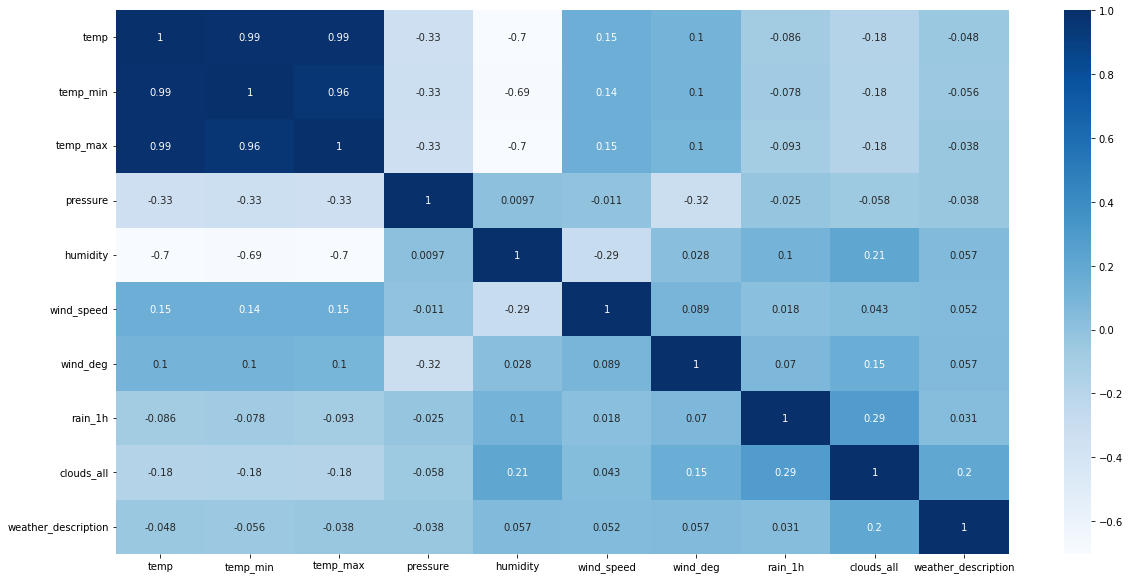

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap="Blues", annot=True)

# Split Train Test

In [24]:
from sklearn.model_selection import train_test_split

X = df.drop(['weather_description'], axis=1)
y = df['weather_description']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=75)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
col = ['temp','temp_min','temp_max','pressure','humidity','wind_speed','wind_deg','rain_1h','clouds_all']

X_train = pd.DataFrame(X_train, columns= col)
X_test = pd.DataFrame(X_test, columns= col)
X_train.head()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,clouds_all
0,0.366126,0.427315,0.299294,0.331763,0.830133,-0.270408,1.089638,-0.141067,-0.737528
1,0.060768,0.123608,-0.001995,0.463109,0.025197,-0.013939,-0.670898,-0.141067,0.065495
2,-0.351465,-0.635659,-0.202854,0.419327,-1.814657,1.090446,-0.564557,-0.141067,-0.737528
3,-1.160663,-1.091219,-1.207150,0.069072,1.520078,1.011935,-0.588188,-0.141067,-0.737528
4,0.366126,0.427315,0.299294,2.564639,-0.319776,-0.008705,-0.446400,-0.141067,0.065495


# Build Arsitektur ANN

In [27]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(X_test.shape[1], 1)),
                                    tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation="relu"), 
                                    tf.keras.layers.Dense(29, activation="softmax")
                                    ])
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 9)                 0         
                                                                 
 dense (Dense)               (None, 128)               1280      
                                                                 
 dense_1 (Dense)             (None, 29)                3741      
                                                                 
Total params: 5,021
Trainable params: 5,021
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=10, epochs=20) #update weighting

Epoch 1/20
19736/19736 [==============================] - 70s 4ms/step - loss: 0.3970 - accuracy: 0.8995 - val_loss: 0.3449 - val_accuracy: 0.9124
Epoch 2/20
19736/19736 [==============================] - 79s 4ms/step - loss: 0.3363 - accuracy: 0.9130 - val_loss: 0.3363 - val_accuracy: 0.9130
Epoch 3/20
19736/19736 [==============================] - 90s 5ms/step - loss: 0.3311 - accuracy: 0.9138 - val_loss: 0.3319 - val_accuracy: 0.9144
Epoch 4/20
19736/19736 [==============================] - 97s 5ms/step - loss: 0.3282 - accuracy: 0.9144 - val_loss: 0.3317 - val_accuracy: 0.9136
Epoch 5/20
19736/19736 [==============================] - 79s 4ms/step - loss: 0.3262 - accuracy: 0.9146 - val_loss: 0.3274 - val_accuracy: 0.9150
Epoch 6/20
19736/19736 [==============================] - 81s 4ms/step - loss: 0.3237 - accuracy: 0.9150 - val_loss: 0.3294 - val_accuracy: 0.9158
Epoch 7/20
19736/19736 [==============================] - 93s 5ms/step - loss: 0.3231 - accuracy: 0.9152 - val_loss: 0

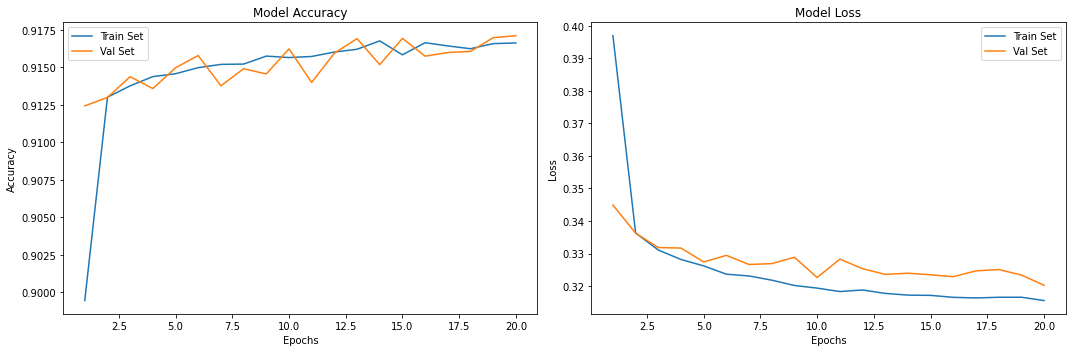

In [29]:
# plot model performance

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [30]:
y_test_class = y_test.values
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

2056/2056 [==============================] - 5s 2ms/step


# Evaluation Matrix

In [31]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

print('Accuracy Score Test Data  :', accuracy_score(y_test_class, y_pred))
print('Precision Score Test Data :', precision_score(y_test_class, y_pred, average='weighted'))
print('Recall Score Test Data    :', recall_score(y_test_class, y_pred, average='weighted'))
print('F1 Score Test Data        :', f1_score(y_test_class, y_pred, average='weighted'))


Accuracy Score Test Data  : 0.9171075033442783
Precision Score Test Data : 0.8940865367178493
Recall Score Test Data    : 0.9171075033442783
F1 Score Test Data        : 0.9004785065466682


c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Confusion Matrix

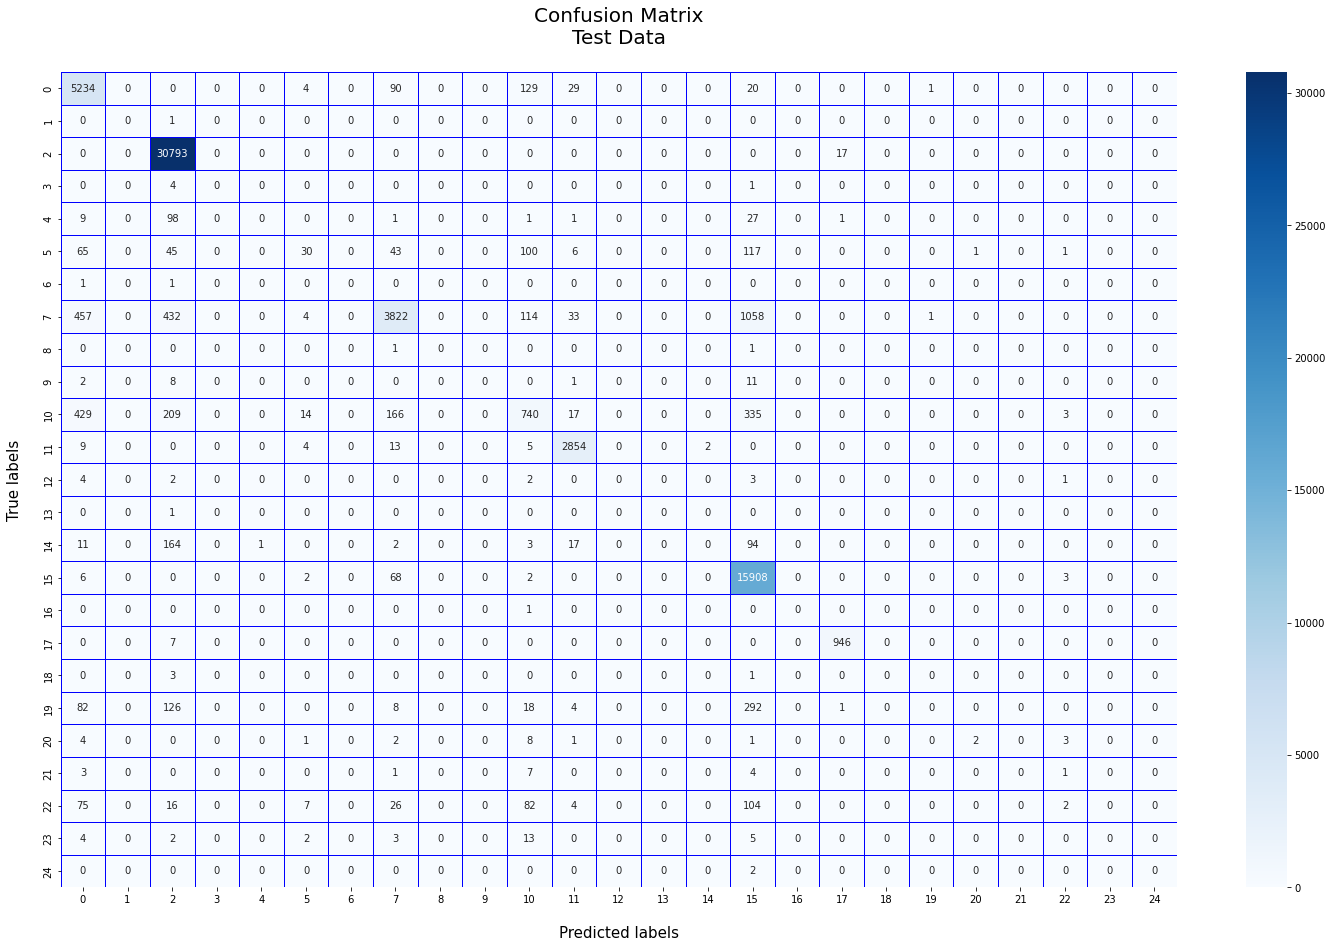

In [67]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, cohen_kappa_score
Cmatrix_test = metrics.confusion_matrix(y_test_class, y_pred)
# class_names = test_generator.class_indices

plt.figure(figsize = (25,15))
ax= plt.subplot()

sns.heatmap(Cmatrix_test, annot=True, fmt='',ax=ax, linewidths=.5, cmap=plt.cm.Blues, linecolor='blue')
# labels, title and ticks
ax.set_xlabel('\nPredicted labels', fontsize=15)
ax.set_ylabel('True labels\n', fontsize=15) 
# ax.xaxis.set_ticklabels(class_names,fontsize=15)   
# ax.yaxis.set_ticklabels(class_names,fontsize=15)
plt.title('Confusion Matrix\nTest Data\n',fontsize=20)
plt.show()

# Classification Report

In [33]:
from sklearn.metrics import classification_report
print('Classification Report Test Data')
print(classification_report(y_test_class, y_pred))

Classification Report Test Data
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      5507
           2       0.00      0.00      0.00         1
           3       0.96      1.00      0.98     30810
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00       138
           6       0.44      0.07      0.13       408
           8       0.00      0.00      0.00         2
           9       0.90      0.65      0.75      5921
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00        22
          12       0.60      0.39      0.47      1913
          13       0.96      0.99      0.98      2887
          15       0.00      0.00      0.00        12
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00       292
          19       0.88      0.99      0.94     15989
          20       0.00      0.00      0.00      

c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

# Test

In [34]:
X_test['pred'] = y_pred

In [35]:
X_test['desc_pred'] = le.inverse_transform(X_test['pred'])
X_test

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,clouds_all,pred,desc_pred
0,-0.809502,-0.741956,-0.860668,-0.018492,0.715142,-1.165431,1.574080,2.036652,1.992750,9,light rain
1,-1.109770,-1.091219,-1.106720,0.550673,0.485160,0.252997,-0.446400,-0.141067,-0.737528,3,few clouds
2,-0.142804,-0.078863,-0.202854,0.069072,-0.204785,0.252997,-0.682714,-0.141067,0.065495,19,scattered clouds
3,-0.702626,-0.736895,-0.705002,1.732784,-0.204785,1.069509,-0.800870,-0.141067,-0.737528,3,few clouds
4,1.892916,1.945849,1.805738,-0.412529,-1.239703,-0.270408,-0.446400,-0.141067,-0.737528,3,few clouds
...,...,...,...,...,...,...,...,...,...,...,...
65779,0.366126,0.427315,0.299294,-0.149837,0.025197,-0.008705,2.034892,-0.141067,0.065495,19,scattered clouds
65780,-0.086821,-0.023184,-0.147617,-0.018492,0.025197,1.074743,1.385030,0.391264,2.394262,9,light rain
65781,1.058271,0.933493,1.102731,-2.163804,-0.779739,1.613851,1.207794,-0.141067,-0.737528,3,few clouds
65782,-0.244589,-0.180099,-0.303283,0.419327,0.370170,0.985765,-0.741792,-0.141067,1.992750,13,overcast clouds


# CONCLUSION

Dari percobaan diatas dapat disimpulkan bahwa:
- Diperoleh nilai akurasi dan loss sebesar 0.915 dan 0.316 melalui 4 layer ANN dengan 20 Epoch dan 10 bath_size.


Saran:
- Dilakukan perbaikan model ANN lagi sehingga dapat memperoleh nilai akurasi yang lebih besar dari yang sekarang.